# E3SM data loading


In [50]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## E3SM data

In [116]:
path = "/home/simon/Downloads/input_vars.v2.LR.amip.non_ndg.eam.h1.latlon.1980-1981combo.nc"
e3sm_data = xr.load_dataset(path)

In [53]:
e3sm_data

<xarray.Dataset> Size: 5GB
Dimensions:              (time: 345, lat: 180, nbnd: 2, lon: 360, cosp_ht: 40,
                          cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6,
                          cosp_reffliq: 6, cosp_sr: 15, cosp_tau: 7,
                          cosp_tau_modis: 7, ilev: 73, lev: 72, cosp_scol: 10,
                          cosp_sza: 5)
Coordinates: (12/16)
  * lat                  (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
  * cosp_htmisr          (cosp_htmisr) float64 128B 0.0 250.0 ... 1.8e+04
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 48B 5e-06 1.5e-05 ... 7.5e-05
    ...                   ...
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_tau_modis       (cosp_tau_modis) float64 56B 0.15 0.8 ... 41.5 100.0
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * time                 (time) object 3kB 1980-01-21 00:00:00 ... 1980-12-31...
    t_days               (time) int64 3kB 20 21 22 23 24 ... 360 361 362 363 364
Dimensions without coordinates: nbnd
Data variables: (12/89)
    lat_bnds             (time, lat, nbnd) float64 994kB -90.0 -89.0 ... 90.0
    lon_bnds             (time, lon, nbnd) float64 2MB 0.0 1.0 ... 359.0 360.0
    gw                   (time, lat) float64 497kB 0.0001523 ... 0.0001523
    area                 (time, lat, lon) float64 179MB 2.658e-06 ... 2.658e-06
    CLDTOT               (time, lat, lon) float32 89MB 0.9926 0.9926 ... 0.9615
    FLDS                 (time, lat, lon) float32 89MB 150.8 150.7 ... 211.6
    ...                   ...
    nsbase               (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nscur                (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nsteph               (time) int32 1kB 1928160 1928208 ... 1944624 1944672
    sol_tsi              (time) float64 3kB -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) object 6kB 1980-01-20 00:00:00 ... 1980...
    time_written         (time) |S8 3kB b'14:49:46' b'14:49:55' ... b'15:44:24'
Attributes: (12/26)
    ne:                        30
    fv_nphys:                  2
    title:                     EAM History file information
    source:                    E3SM Atmosphere Model
    source_id:                 1e754ed78c
    product:                   model-output
    ...                        ...
    remap_hostname:            login36
    remap_version:             5.2.4
    NCO:                       netCDF Operators version 5.2.4 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /pscratch/sd/p/plma/shared/for_brandon/map_ne3...
    input_file:                /pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.amip_01...

In [52]:
(e3sm_data.PRECT * 1e9 / 3600).max()

<xarray.DataArray 'PRECT' ()> Size: 4B
array(2.1612196, dtype=float32)

In [4]:
lons_e3sm = e3sm_data.lon.data
lats_e3sm = e3sm_data.lat.data

In [54]:
from prithvi_precip.e3sm import E3SMS2SDataset

e3sm_dataset = E3SMS2SDataset(
    "/data/e3sm/training_data/",
)


In [179]:
e3sm_dataset[200]

[cftime.DatetimeNoLeap(1980, 8, 9, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1980, 8, 10, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1980, 8, 28, 0, 0, 0, 0, has_year_zero=True)]


/home/simon/src/prithvi_precip/src/prithvi_precip/e3sm.py:380: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inpt = {


({'x': tensor([[[[-5.2402e-02, -5.2284e-02, -5.2165e-02,  ..., -5.2746e-02,
             -5.2633e-02, -5.2518e-02],
            [-4.9792e-02, -4.9565e-02, -4.9336e-02,  ..., -5.0460e-02,
             -5.0240e-02, -5.0017e-02],
            [-5.5659e-02, -5.5024e-02, -5.4384e-02,  ..., -5.7520e-02,
             -5.6909e-02, -5.6288e-02],
            ...,
            [ 1.5507e+00,  1.4525e+00,  1.3546e+00,  ...,  1.8462e+00,
              1.7476e+00,  1.6491e+00],
            [ 1.4581e+00,  1.4197e+00,  1.3812e+00,  ...,  1.5727e+00,
              1.5346e+00,  1.4964e+00],
            [ 1.2855e+00,  1.2768e+00,  1.2682e+00,  ...,  1.3115e+00,
              1.3028e+00,  1.2942e+00]],
  
           [[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
              1.0000e+00,  1.0000e+00],
            [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
              1.0000e+00,  1.0000e+00],
            [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
              1

In [55]:
e3sm_dataset._precip_climatology = None

In [56]:
precip_climate = e3sm_dataset.precip_climatology

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.09s/it]


In [164]:
x, y = e3sm_dataset[90]

/home/simon/src/prithvi_precip/src/prithvi_precip/e3sm.py:379: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [165]:
%env PRITHVI_DATA_PATH=/data/precipfm/training_data/climatology

env: PRITHVI_DATA_PATH=/data/precipfm/training_data/climatology


In [170]:
from pytorch_retrieve import load_model
mdl = load_model("/gdata1/simon/precipfm/model_obs/prithvi_precip_direct.pt")

In [171]:
x_scaled = (x["x"] - mdl.backbone.input_scalers_mu[0]) / mdl.backbone.input_scalers_sigma[0]

In [168]:
e3sm_data.OMEGA500.max()

<xarray.DataArray 'OMEGA500' ()> Size: 4B
array(1.4968499, dtype=float32)

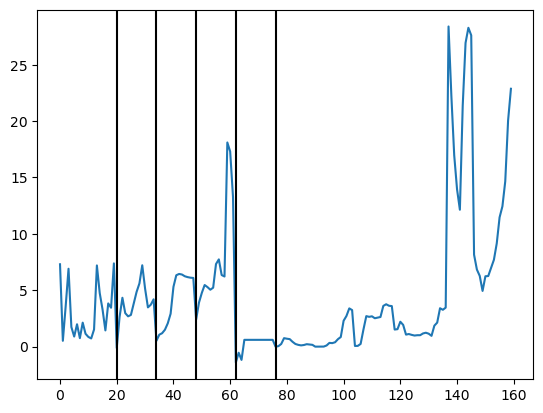

In [173]:
plt.plot(x_scaled.numpy().max(axis=(-2, -1))[0])
plt.axvline(20, c="k")
plt.axvline(34, c="k")
plt.axvline(48, c="k")
plt.axvline(62, c="k")
plt.axvline(76, c="k")

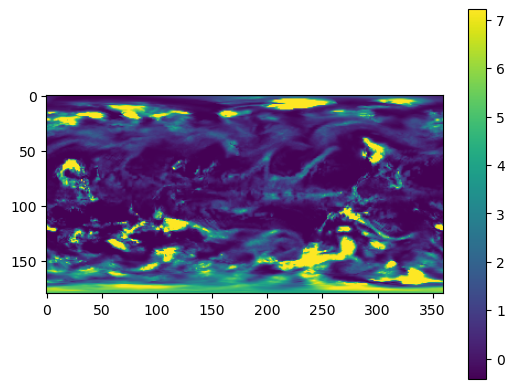

In [104]:
plt.imshow(x_scaled[0, 29])
plt.colorbar()

In [ ]:
input_mu = xr.load_dataset("/data/precipfm/training_data/climatology/m

In [114]:
x_sum = torch.zeros(160)
xx_sum = torch.zeros(160)
x_cts = torch.zeros(160)

x_static_sum =
xx_static_sum =
x_static_cts =

for ind in range(list(e3sm_dataset)):
    inpt, y = e3sm_dataset[ind]

    x = inpt["x"]
    valid = torch.isfinite(x)
    xx = x * x
    if x_sum is None:
        
    
    

SyntaxError: invalid syntax (2192421408.py, line 5)

## Data loading

In [117]:
import sys
sys.path.insert(0, "../src")

In [118]:
from prithvi_precip.e3sm import load_dynamic_data

In [119]:
input_data = load_dynamic_data(e3sm_data[{"time": 0}], "/data/e3sm/climatology/")

## Create climatology

In [9]:
lons_e3sm

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

## Compare variables

In [115]:
merra_data = xr.load_dataset("/data/precipfm/training_data/dynamic/2006/01/01/merra2_20060101000000.nc")

In [12]:
from matplotlib.gridspec import GridSpec

def plot_fields(e3sm_field, input_data, merra_field):

    if e3sm_field is not None:
        vmax = max(np.nanmax(e3sm_field.data), np.nanmax(merra_field.data))
        vmin = min(np.nanmin(e3sm_field.data), np.nanmin(merra_field.data))
    else:
        vmax = np.nanmax(merra_field.data)
        vmin = np.nanmin(merra_field.data)
    gs = GridSpec(1, 4, width_ratios=[1.0, 1.0, 1.0, 0.075])
    fig = plt.figure(figsize=(20, 4))
    
    ax = fig.add_subplot(gs[0, 0])
    if e3sm_field is not None:
        lons = e3sm_field.lon
        lats = e3sm_field.lat
        ax.pcolormesh(lons, lats, e3sm_field, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.set_title("(a) E3SM", loc="left")
        ax.set_xlabel("Longitude [$^\circ$ E]")
        ax.set_ylabel("Latitude [$^\circ$ N]")
        
        ax = fig.add_subplot(gs[0, 1])
        ax.pcolormesh(lons, lats, input_data, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.set_title("(b) Input data", loc="left")
        ax.set_xlabel("Longitude [$^\circ$ E]")
        ax.set_ylabel("Latitude [$^\circ$ N]")
    else:
        ax = fig.add_subplot(gs[0, 1])
        ax.pcolormesh(input_data, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.set_title("(b) Input data", loc="left")
        ax.set_xlabel("Longitude [$^\circ$ E]")
        ax.set_ylabel("Latitude [$^\circ$ N]")
    
    ax = fig.add_subplot(gs[0, 2])
    lons = merra_field.longitude
    lats = merra_field.latitude
    m = ax.pcolormesh(lons, lats, merra_field, vmin=vmin, vmax=vmax, cmap="plasma")
    ax.set_title("(c) MERRA 2", loc="left")
    ax.set_xlabel("Longitude [$^\circ$ E]")

    cax = fig.add_subplot(gs[0, 3])
    plt.colorbar(m, cax=cax)

### EFLUX -> LHFLX

Surface latent heat flux.

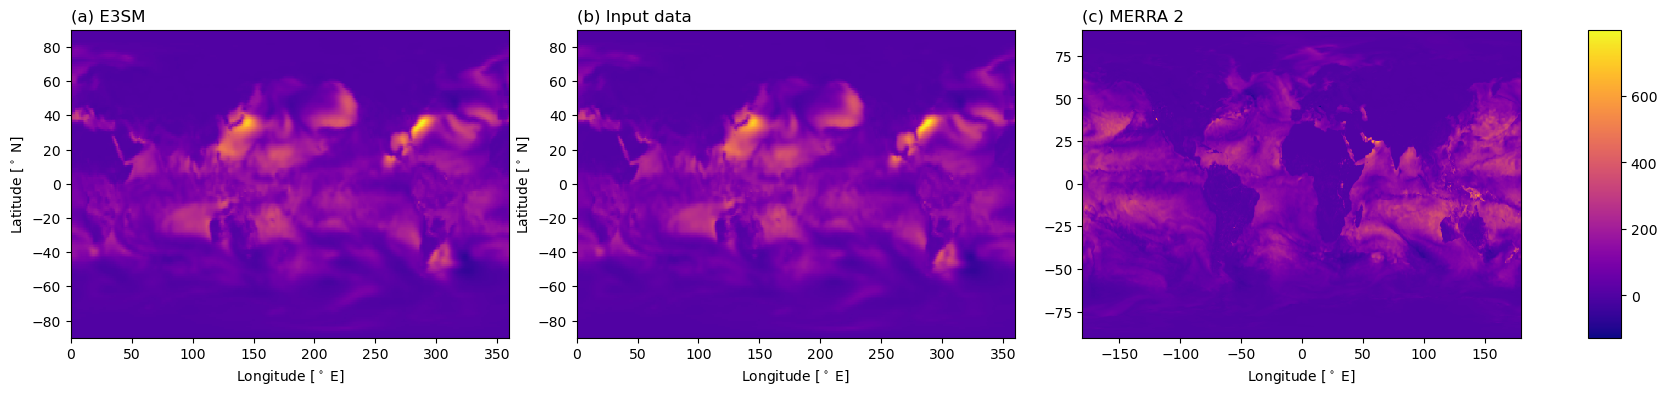

In [13]:
plot_fields(e3sm_data.LHFLX[0], input_data[0], merra_data.EFLUX)

### HFLUX -> SHFLX

Surface sensible heat flux.

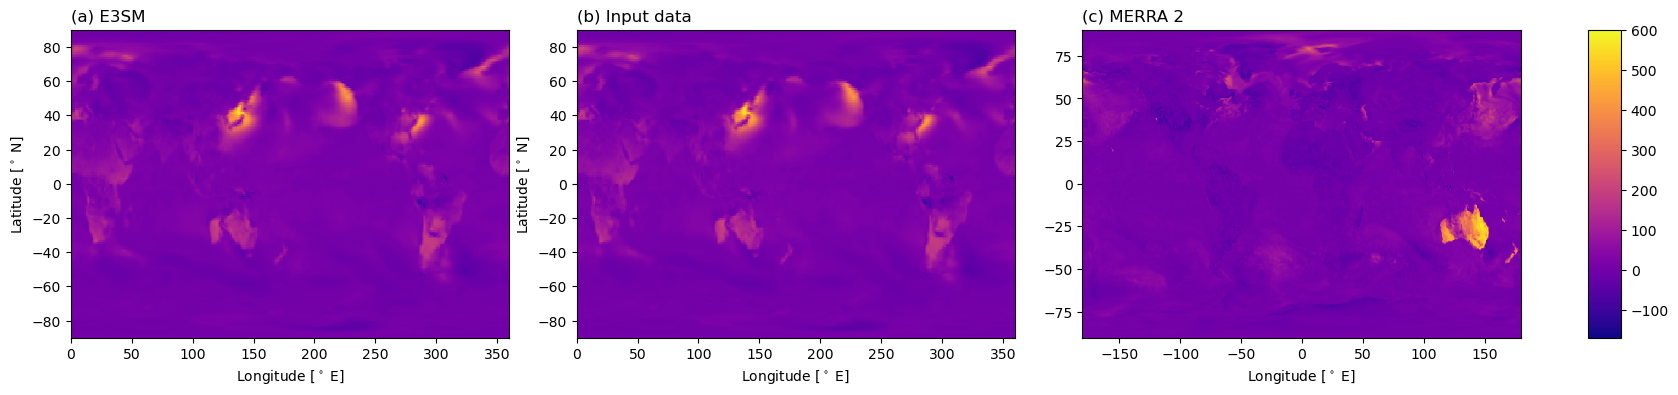

In [14]:
plot_fields(e3sm_data.SHFLX[0], input_data[2], merra_data.HFLUX)

### LWGAB -> FLDS

Downwelling long wave flux at surface.

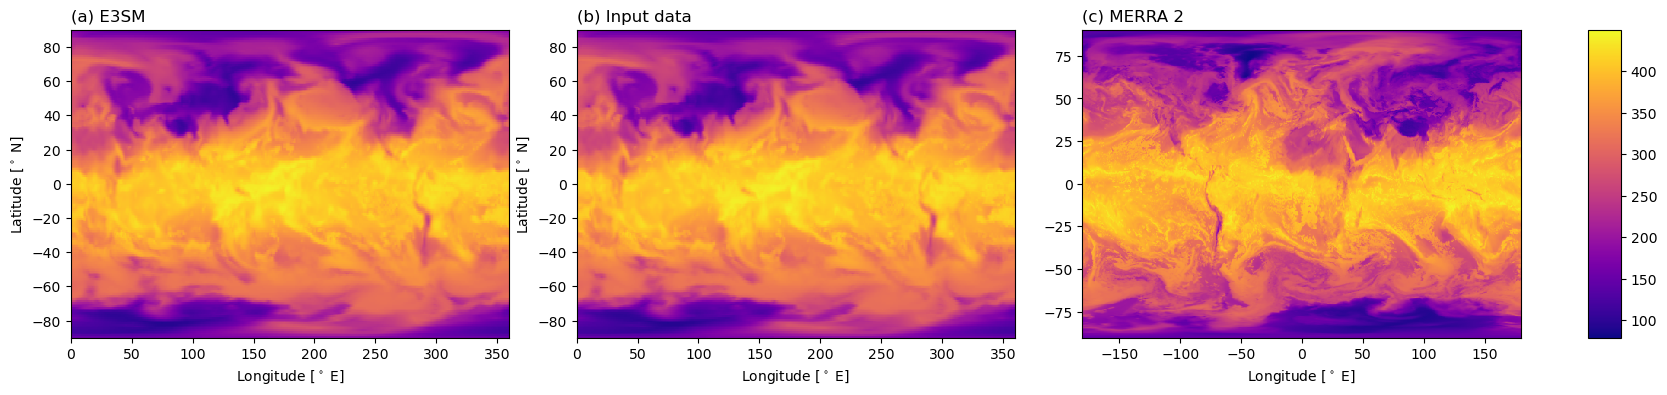

In [15]:
plot_fields(e3sm_data.FLDS[0], input_data[4], merra_data.LWGAB)

### LWGEM -> FLDS - FLNS

Upweeling long wave flux at surface.

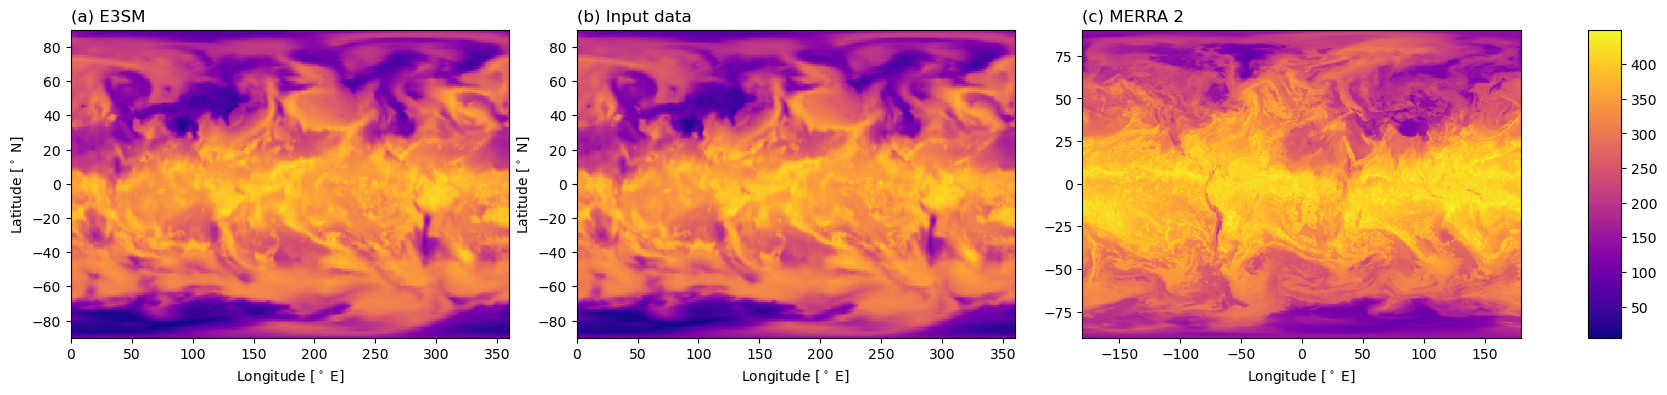

In [16]:
plot_fields(e3sm_data.FLDS[0] - e3sm_data.FLNS[0], input_data[5], merra_data.LWGAB)

### LWTUP -> FLUT

Upwelling long wave flux at TOA.

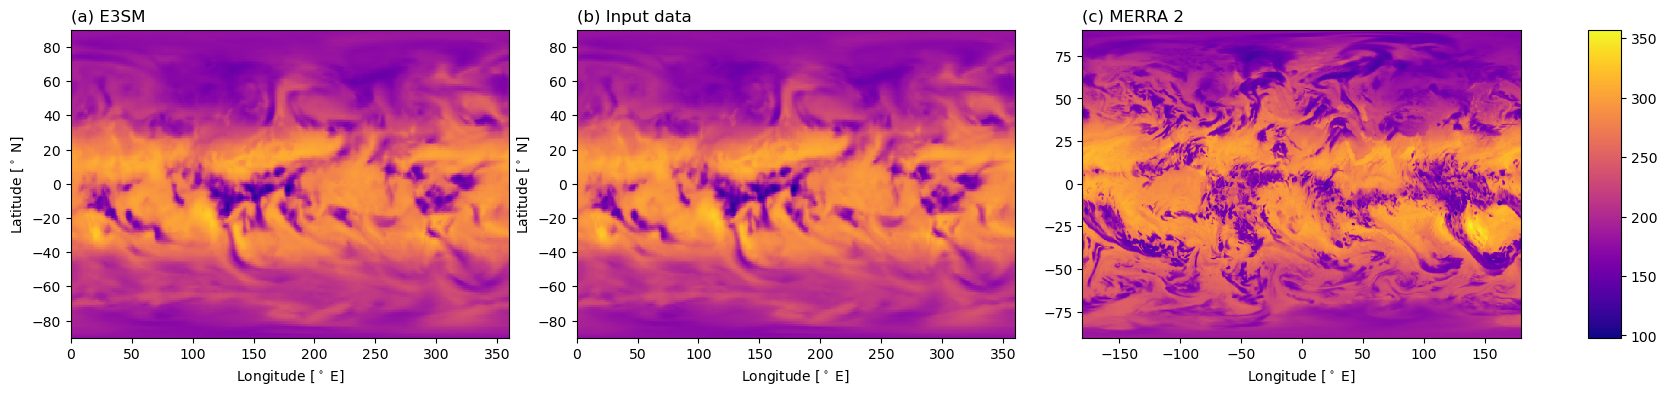

In [17]:
plot_fields(e3sm_data.FLUT[0], input_data[6], merra_data.LWTUP)

### PS -> PS

Surface pressure

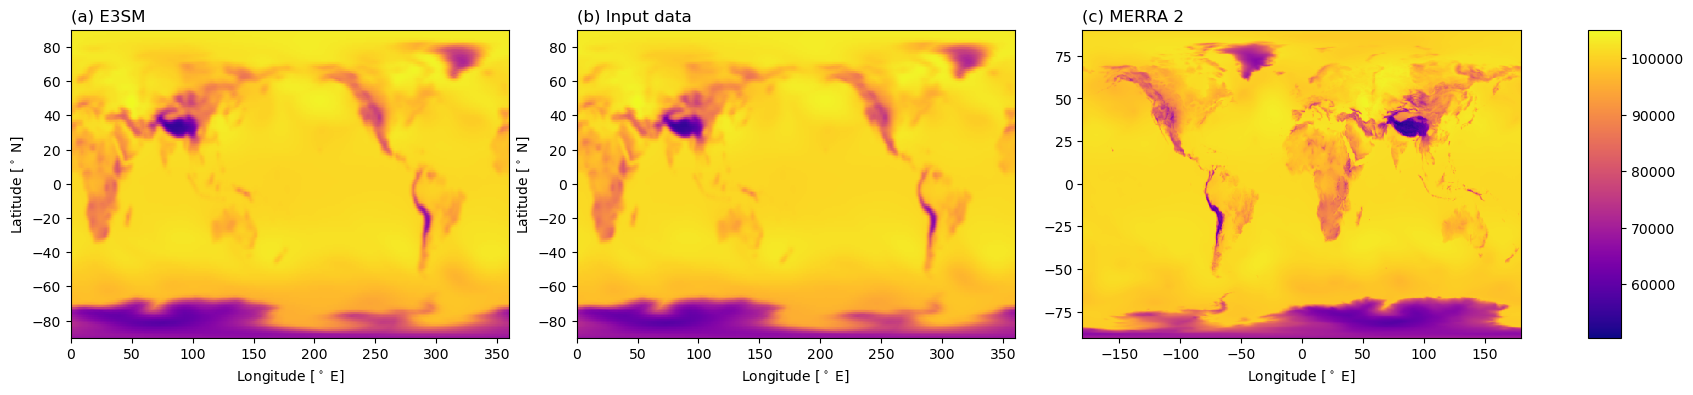

In [18]:
plot_fields(e3sm_data.PS[0], input_data[7], merra_data.PS)

### QREFHT -> QV2M

Near-surface water vapor

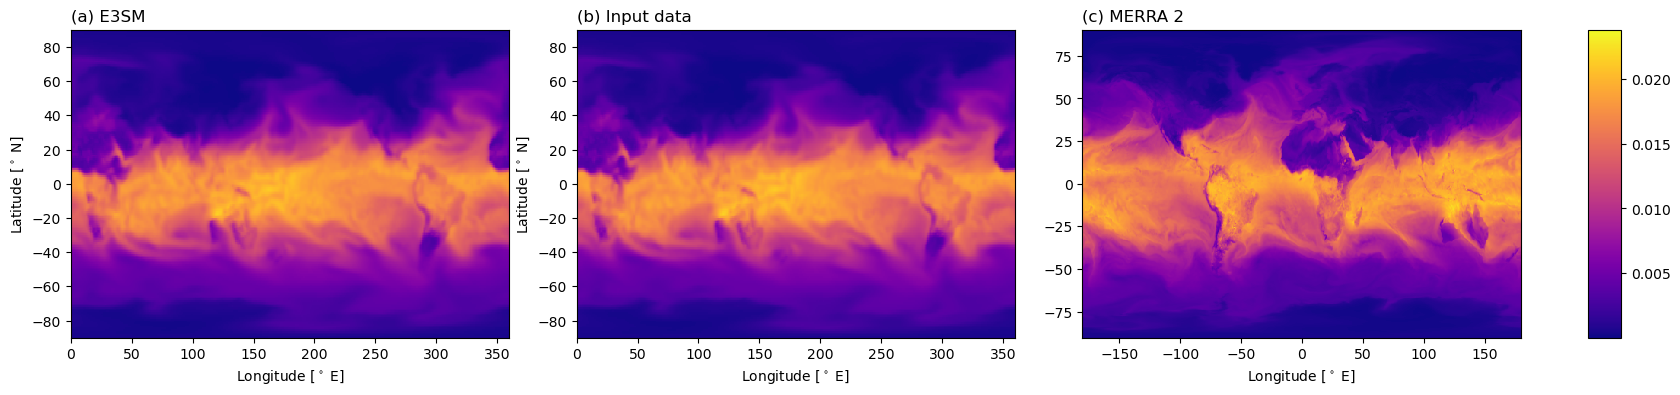

In [19]:
plot_fields(e3sm_data.QREFHT[0], input_data[8], merra_data.QV2M)

### SWGNT -> FSNS

Short-wave flux at surface

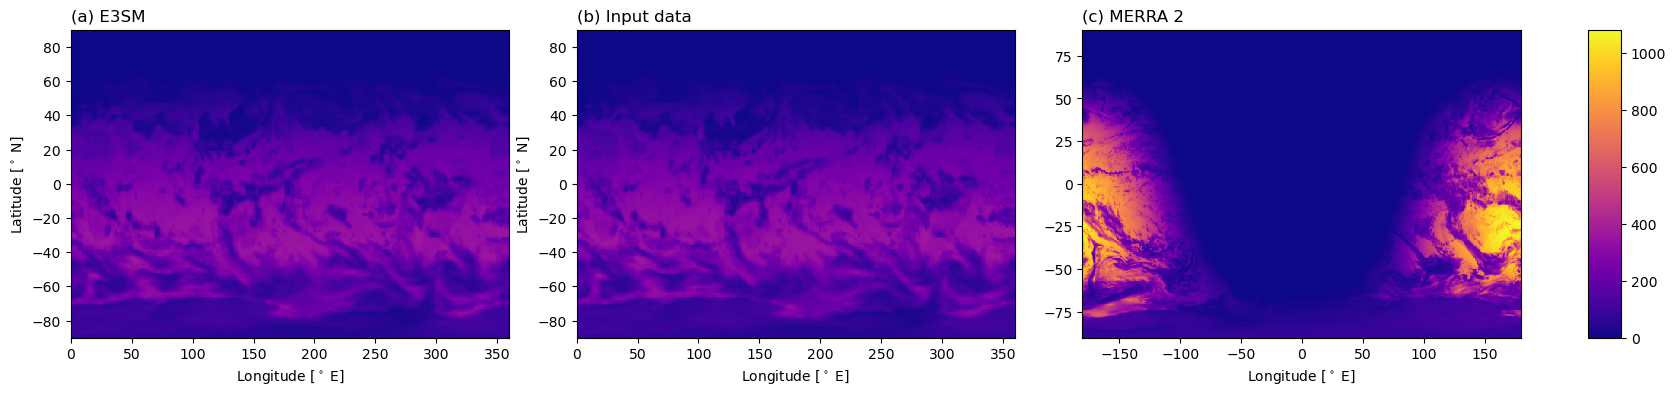

In [20]:
plot_fields(e3sm_data.FSNS[0], input_data[10], merra_data.SWGNT)

### SWTNT -> FSNT

Short-wave flux at TOA

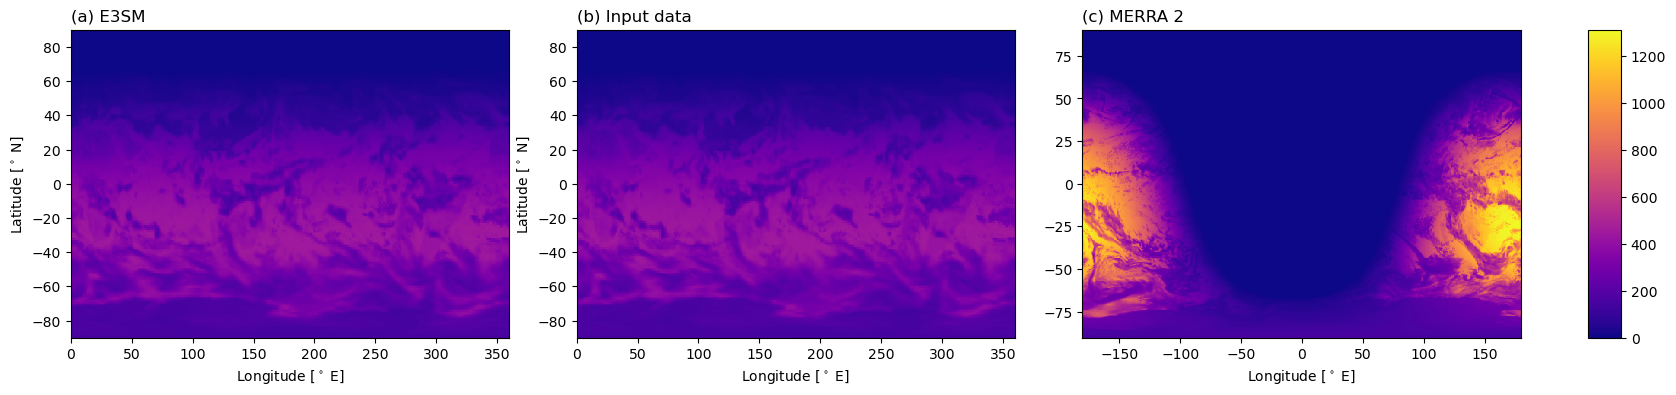

In [21]:
plot_fields(e3sm_data.FSNT[0], input_data[11], merra_data.SWTNT)

### T2M -> TS

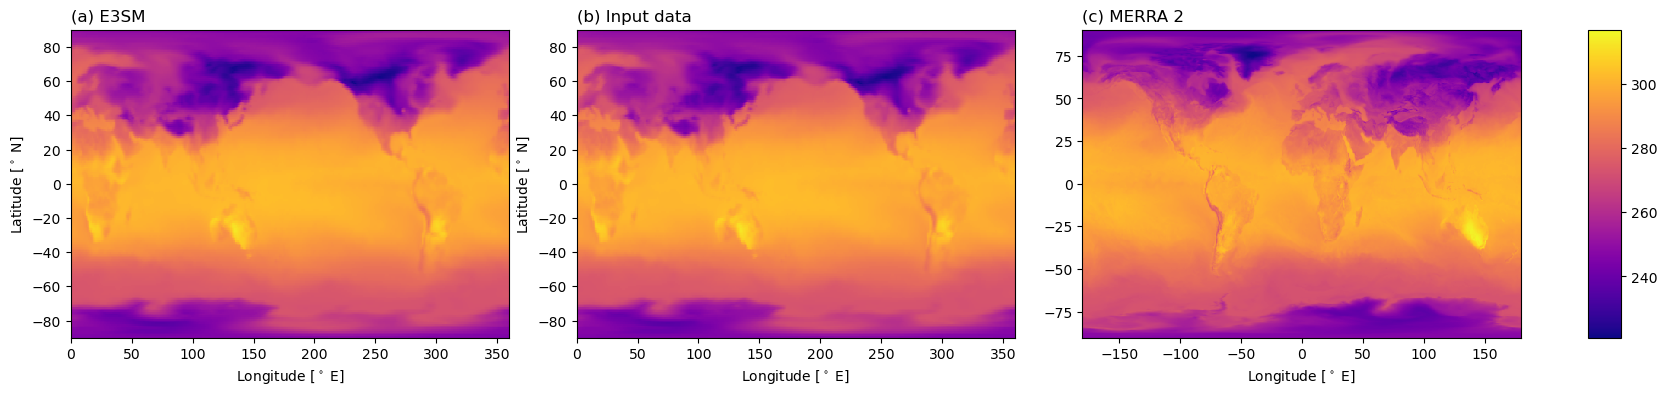

In [22]:
plot_fields(e3sm_data.TS[0], input_data[12], merra_data.T2M)

### TQI -> TGCLDIWP

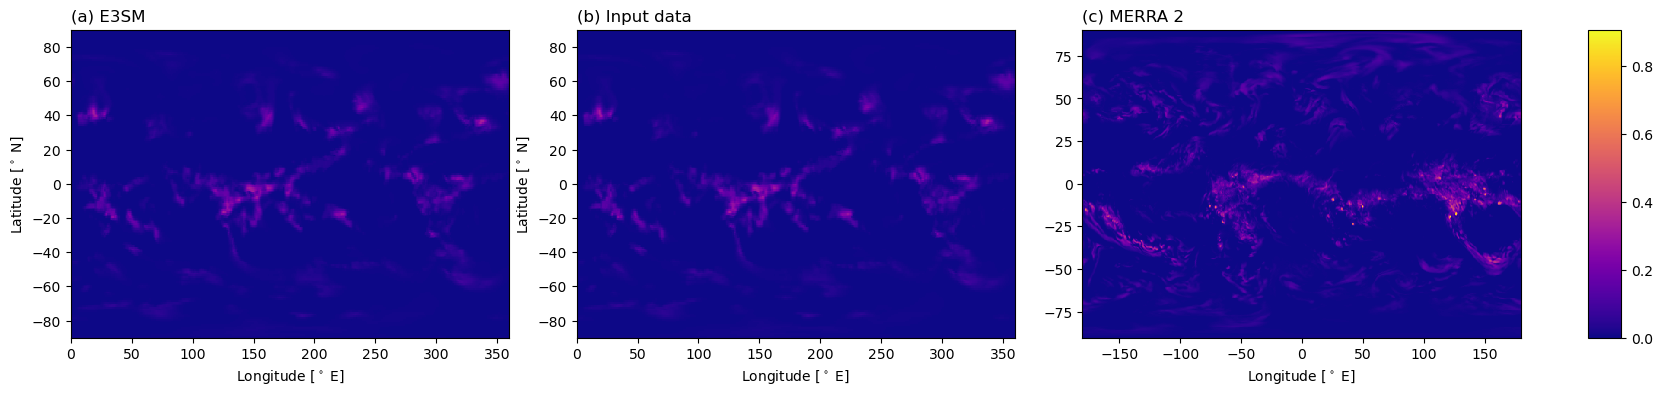

In [23]:
plot_fields(e3sm_data.TGCLDIWP[0], input_data[13], merra_data.TQI)

### TQL -> TGCLDLWP

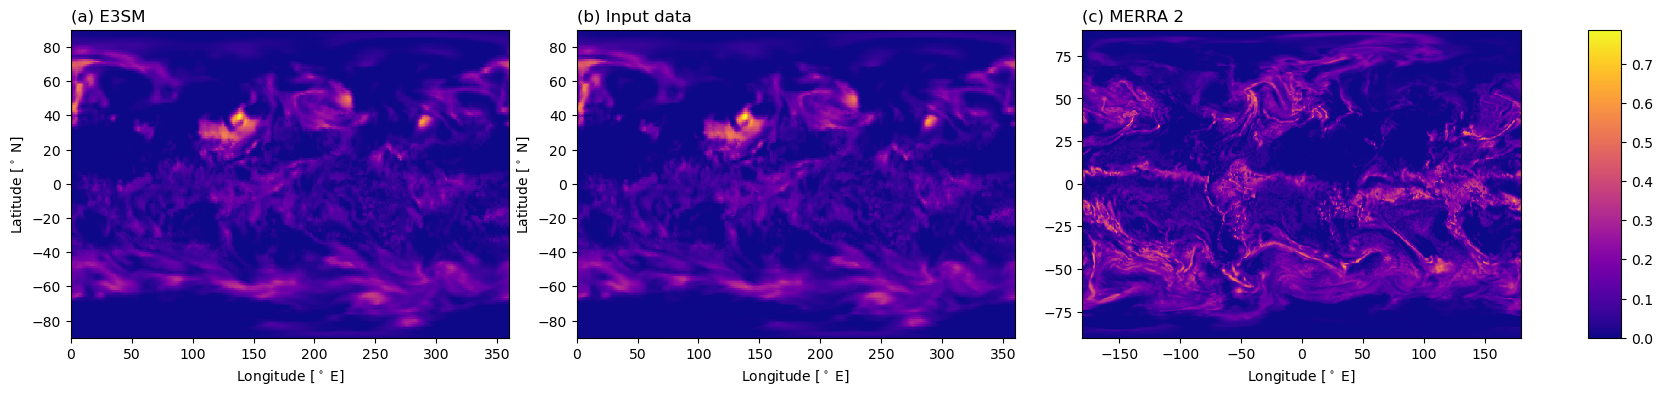

In [24]:
plot_fields(e3sm_data.TGCLDLWP[0], input_data[14], merra_data.TQL)

### TQV -> TMQ

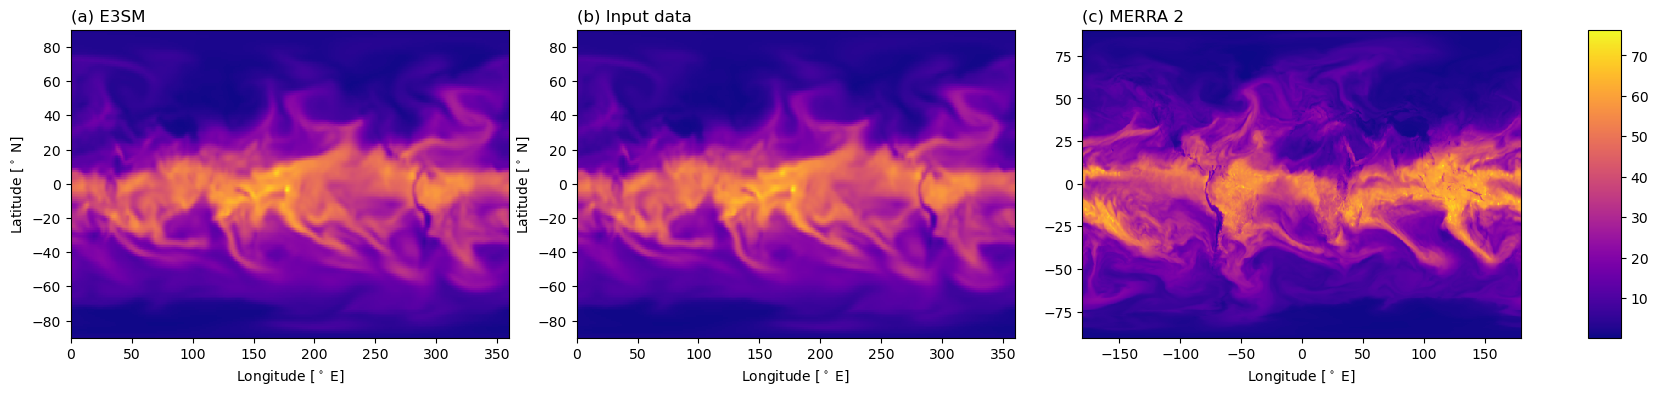

In [25]:
plot_fields(e3sm_data.TMQ[0], input_data[15], merra_data.TQV)

### TS -> TS

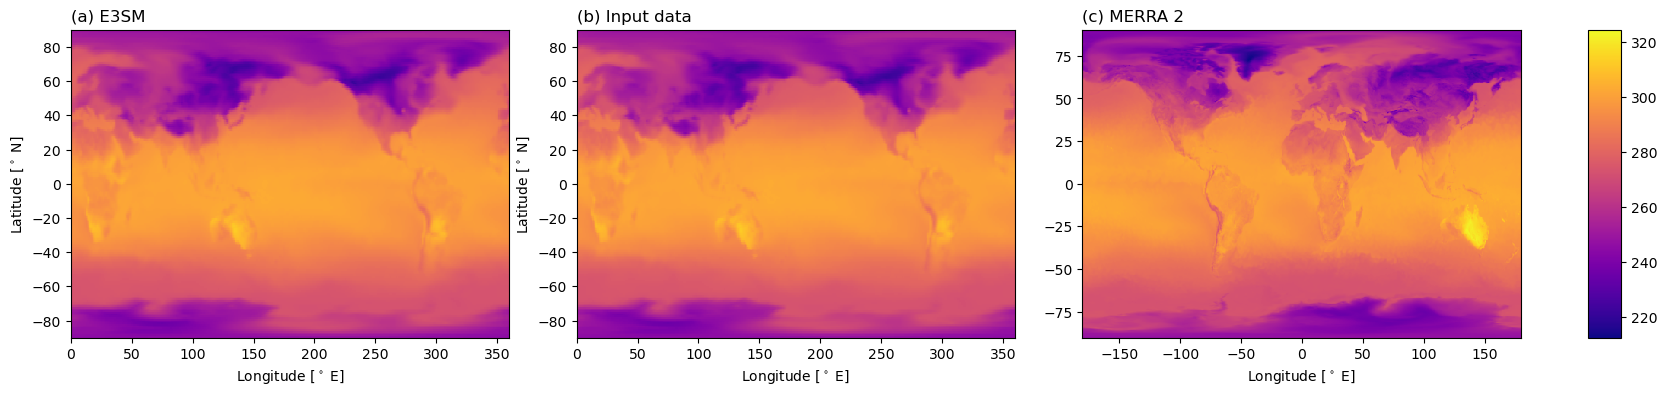

In [26]:
plot_fields(e3sm_data.TS[0], input_data[16], merra_data.TS)

### U10M -> UBOT

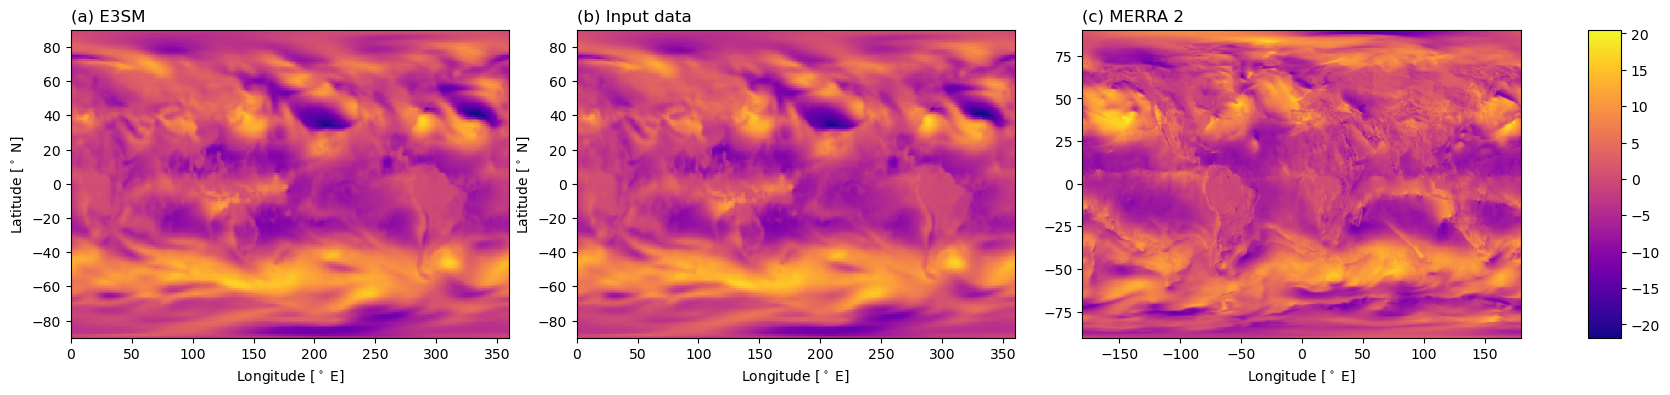

In [27]:
plot_fields(e3sm_data.UBOT[0], input_data[17], merra_data.U10M)

### V10M -> VBOT

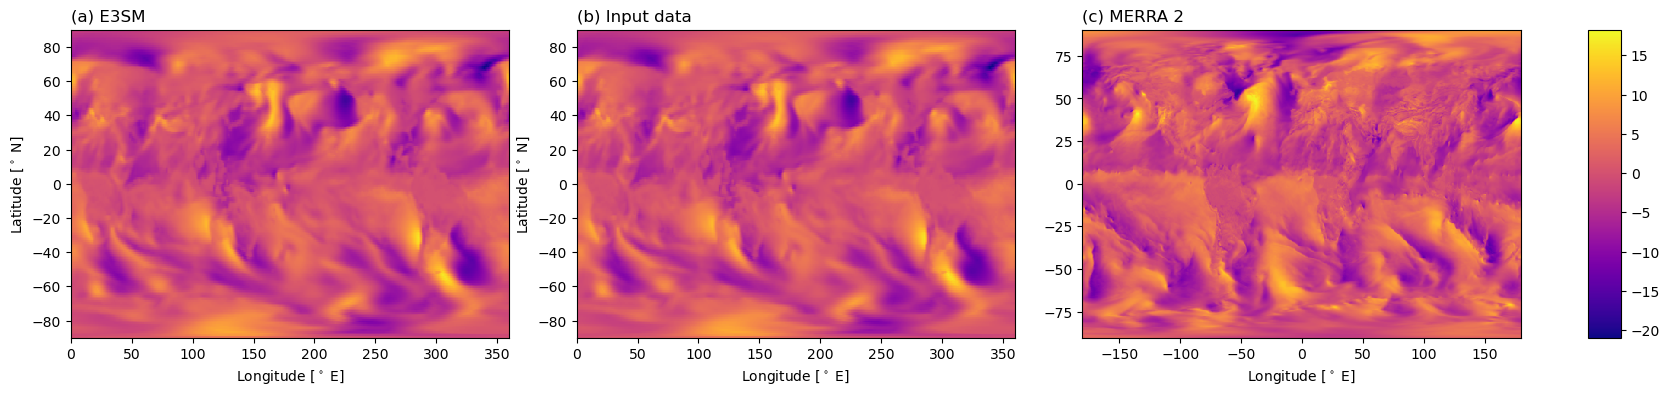

In [28]:
plot_fields(e3sm_data.VBOT[0], input_data[18], merra_data.V10M)

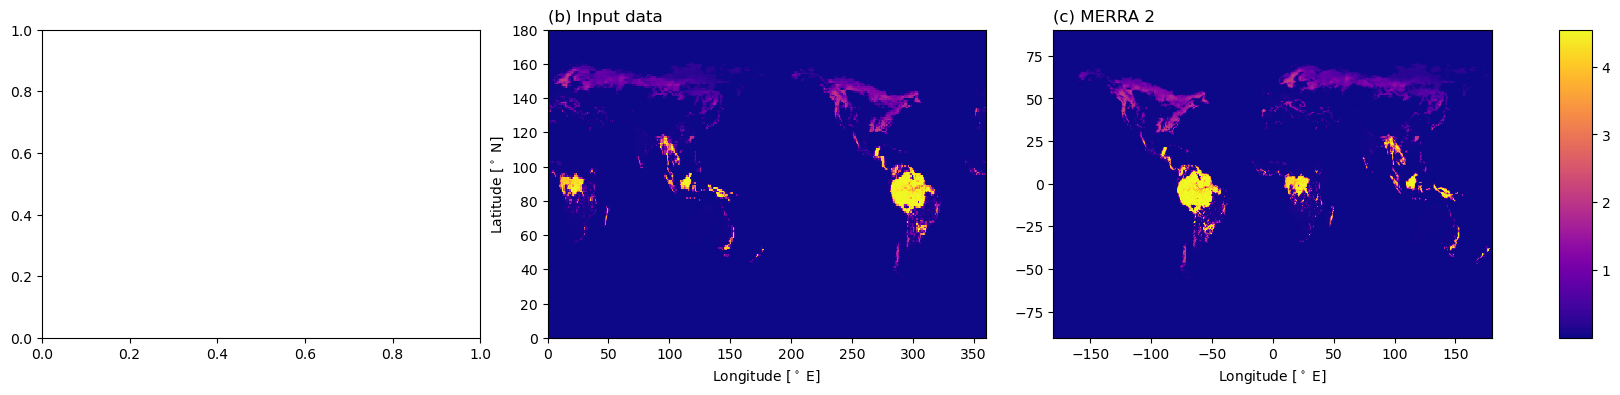

In [29]:
plot_fields(None, input_data[19], merra_data.Z0M)

# Vertical variables

In [120]:
from matplotlib.gridspec import GridSpec

def plot_fields(input_data, merra_field):

    vmin = min(np.nanmin(input_data), np.nanmin(merra_field))
    vmax = max(np.nanmax(input_data), np.nanmax(merra_field))

    gs = GridSpec(1, 3, width_ratios=[1.0, 1.0, 0.075])
    fig = plt.figure(figsize=(13, 4))
    
    ax = fig.add_subplot(gs[0, 0])
    ax.pcolormesh(input_data, vmin=vmin, vmax=vmax, cmap="plasma")
    ax.set_title("(a) Input data", loc="left")
    
    ax = fig.add_subplot(gs[0, 1])
    m = ax.pcolormesh(merra_field, vmin=vmin, vmax=vmax, cmap="plasma")
    ax.set_title("(b) MERRA data", loc="left")
        
    cax = fig.add_subplot(gs[0, 2])
    plt.colorbar(m, cax=cax)

### CLOUD

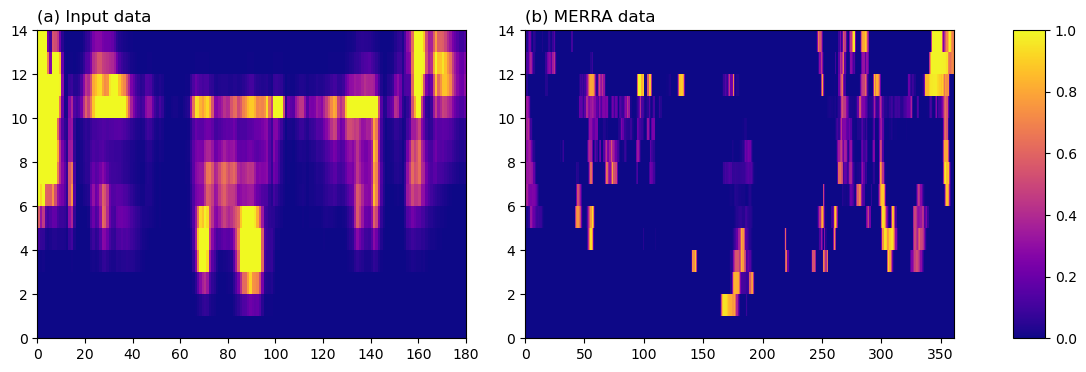

In [121]:
ind = 0
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.CLOUD[:, :, 576 // 2])

## Height

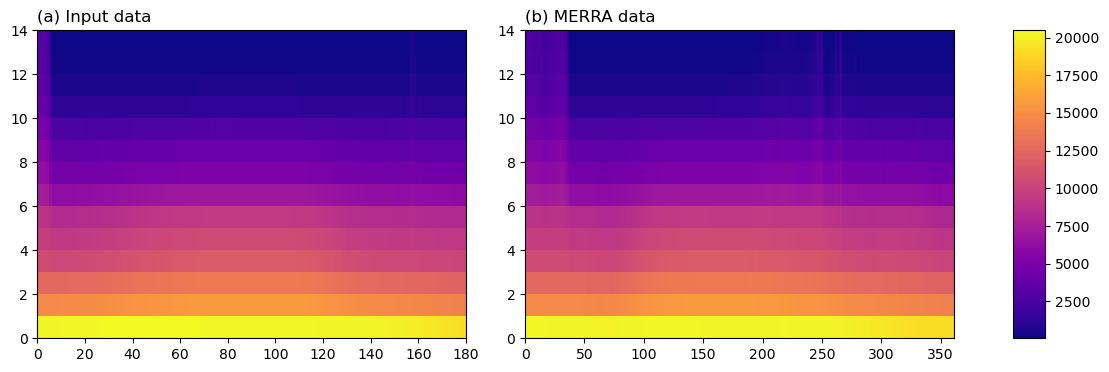

In [122]:
ind = 1
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.H[:, :, 576 // 2])

## Omega

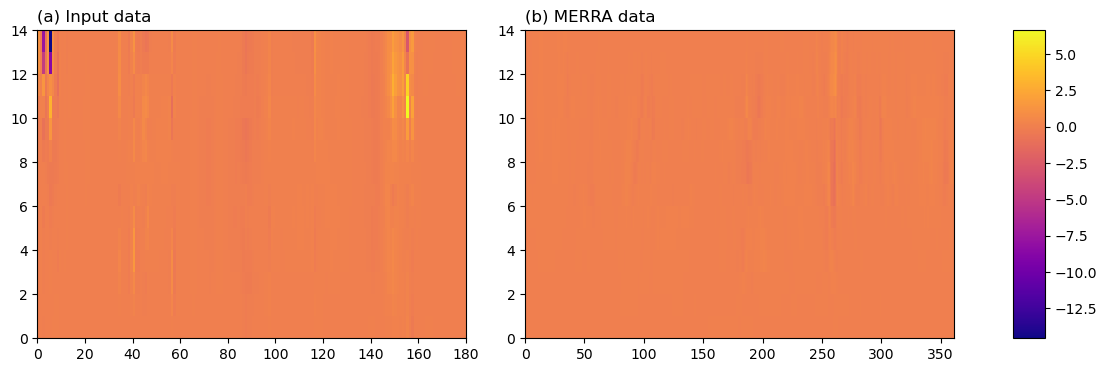

In [123]:
ind = 2
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.OMEGA[:, :, 576 // 2])

## PL

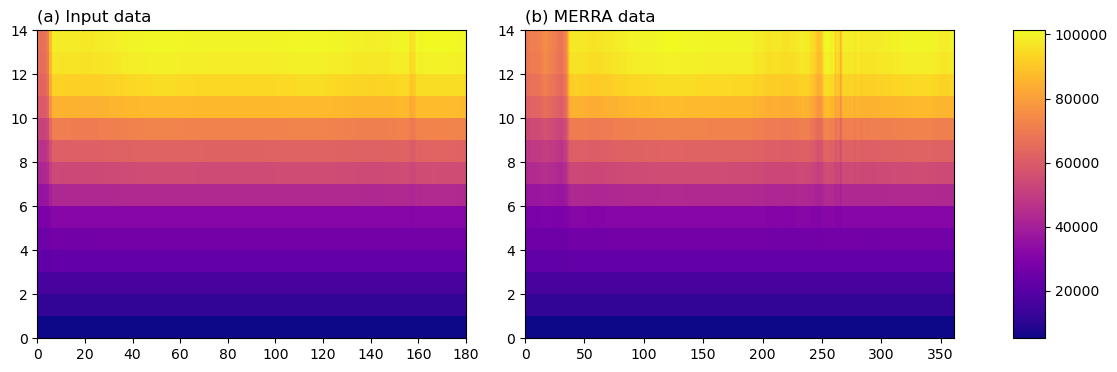

In [124]:
ind = 3
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.PL[:, :, 576 // 2])

## QI

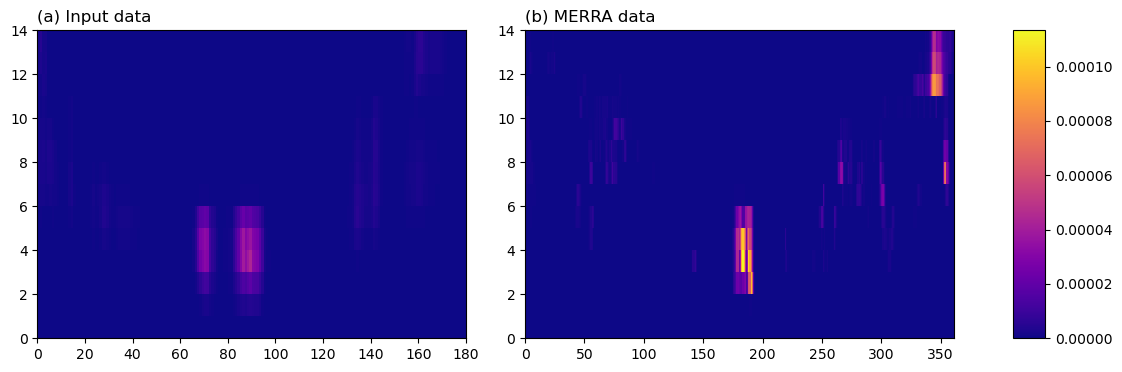

In [125]:
ind = 4
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.QI[:, :, 576 // 2])

## QL

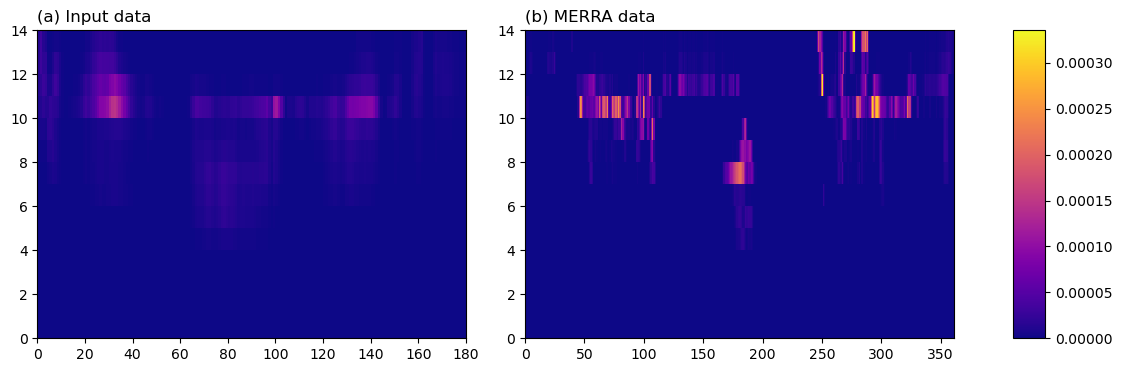

In [126]:
ind = 5
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.QL[:, :, 576 // 2])

# QV

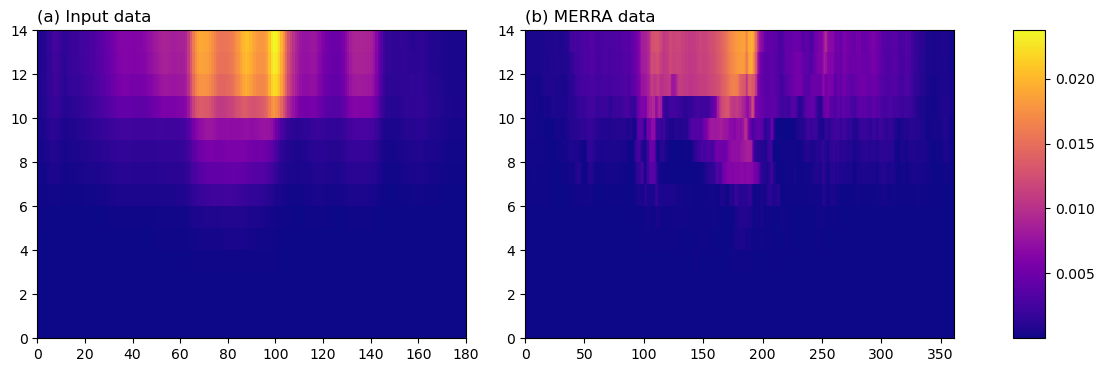

In [127]:
ind = 6
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.QV[:, :, 576 // 2])

## T

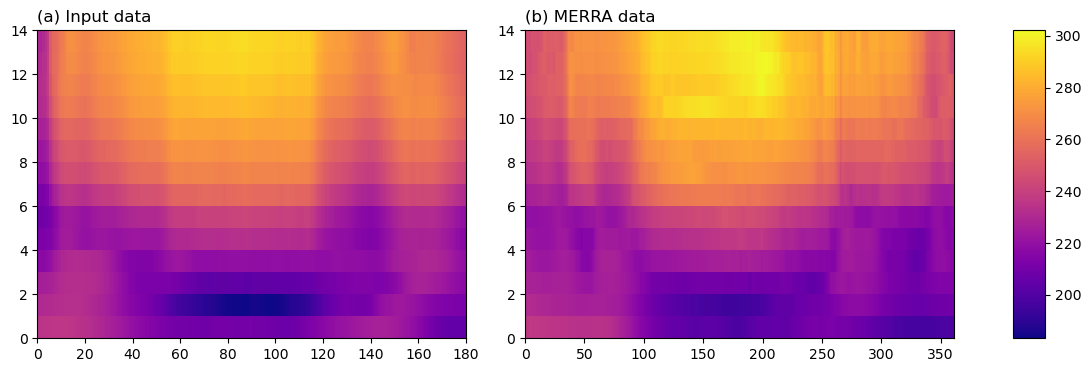

In [128]:
ind = 7
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.T[:, :, 576 // 2])

In [135]:
merra_data.U.max()

<xarray.DataArray 'U' ()> Size: 4B
array(100.756996, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2006-01-01

In [133]:
e3sm_data.U050.max()

<xarray.DataArray 'U050' ()> Size: 4B
array(68.60045, dtype=float32)

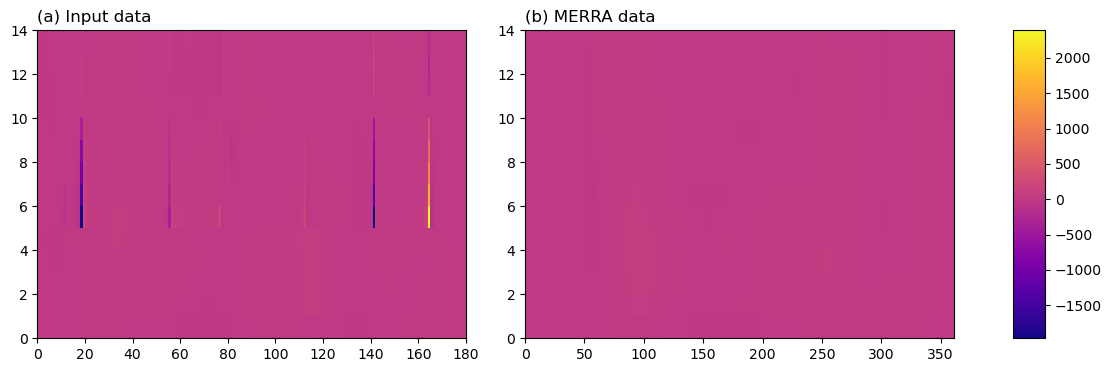

In [129]:
ind = 8
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.U[:, :, 576 // 2])

## Create climatology and static data for E3SM data



In [48]:
prithvi_climatology = sorted(list(Path("/data/precipfm/training_data/climatology/").glob("climate*_hour00*.nc")))
output_path = Path("/data/e3sm/climatology")

In [49]:
from tqdm import tqdm

for path in tqdm(prithvi_climatology):
    data = xr.load_dataset(path)
    lons = data.lon.data
    lons[lons < 0] += 360
    data = data.assign_coords(lon=lons).sortby("lon")
    data = data.interp(lat=lats_e3sm, lon=lons_e3sm, method="nearest", kwargs={"fill_value": "extrapolate"})
    data.to_netcdf(output_path / path.name)
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 730/730 [09:11<00:00,  1.32it/s]


In [65]:
static_data

<xarray.Dataset> Size: 76MB
Dimensions:    (longitude: 576, latitude: 361, time: 13)
Coordinates:
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * time       (time) datetime64[ns] 104B 1980-01-15T12:00:00 ... 1992-01-02T...
Data variables:
    FRLAKE     (time, latitude, longitude) float32 11MB 0.0 0.0 0.0 ... 0.0 0.0
    FRLAND     (time, latitude, longitude) float32 11MB 0.0 0.0 0.0 ... 0.0 0.0
    FRLANDICE  (time, latitude, longitude) float32 11MB 1.0 1.0 1.0 ... 0.0 0.0
    FROCEAN    (time, latitude, longitude) float32 11MB 0.0 0.0 0.0 ... 1.0 1.0
    PHIS       (time, latitude, longitude) float32 11MB 2.758e+04 ... 0.0
    SGH        (time, latitude, longitude) float32 11MB nan nan nan ... 0.0 0.0
    FRACI      (time, latitude, longitude) float32 11MB 1.0 1.0 1.0 ... nan nan
Attributes: (12/30)
    History:                           Updated file generated to remove AREA:...
    Comment:                           GMAO filename: d5124_m2_jan79.const_2d...
    Filename:                          MERRA2_101.const_2d_asm_Nx.00000000.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    LatitudeResolution:                0.5 
    LongitudeResolution:               0.625 
    DataResolution:                    0.5 x 0.625 
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/ME5QX6Q5IGGU
    Source:                            CVS tag: GEOSadas-5_12_4

In [177]:
static_data = xr.load_dataset("/data/precipfm/training_data/static/merra2_static.nc")
lons = static_data.longitude.data
lons[lons < 0] += 360
static_data = static_data.assign_coords(longitude=lons).sortby("longitude")
static_data = static_data.interp(latitude=lats_e3sm, longitude=lons_e3sm, method="nearest", kwargs={"fill_value": "extrapolate"})

output_file = Path("/data/e3sm/static/static.nc")
output_file.parent.mkdir(exist_ok=True)
encoding = {
    var: {"zlib": True} for var in static_data
}
static_data.to_netcdf(output_file, encoding=encoding)

In [49]:
e3sm_data["T100"]

<xarray.DataArray 'T100' (time: 345, lat: 180, lon: 360)> Size: 89MB
array([[[230.28091, 230.28206, 230.28322, ..., 230.27744, 230.2786 ,
         230.27975],
        [230.27118, 230.27368, 230.27618, ..., 230.26366, 230.26616,
         230.26868],
        [230.28546, 230.28966, 230.29384, ..., 230.27267, 230.27696,
         230.28122],
        ...,
        [210.86604, 210.8716 , 210.87733, ..., 210.85057, 210.85553,
         210.8607 ],
        [211.11414, 211.11742, 211.12079, ..., 211.10501, 211.10794,
         211.111  ],
        [211.32181, 211.3232 , 211.3246 , ..., 211.31769, 211.31905,
         211.32042]],

       [[229.87871, 229.87854, 229.87837, ..., 229.87915, 229.87901,
         229.87886],
        [229.97708, 229.97679, 229.97644, ..., 229.9776 , 229.97748,
         229.97731],
        [230.11005, 230.10977, 230.10938, ..., 230.11023, 230.11029,
         230.11023],
...
        [213.54173, 213.52379, 213.50597, ..., 213.5962 , 213.57794,
         213.55978],
        [213.79515, 213.78293, 213.77084, ..., 213.8326 , 213.81999,
         213.80751],
        [214.10414, 214.0977 , 214.0913 , ..., 214.12343, 214.117  ,
         214.11057]],

       [[234.19727, 234.19719, 234.19711, ..., 234.19754, 234.19745,
         234.19734],
        [234.15218, 234.15247, 234.15277, ..., 234.15155, 234.15172,
         234.15193],
        [234.0528 , 234.0542 , 234.05571, ..., 234.04932, 234.05035,
         234.05151],
        ...,
        [215.39091, 215.38383, 215.37726, ..., 215.41527, 215.40663,
         215.39851],
        [216.13054, 216.12534, 216.1205 , ..., 216.1482 , 216.14197,
         216.13608],
        [216.78654, 216.78362, 216.78072, ..., 216.7955 , 216.79248,
         216.7895 ]]], shape=(345, 180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) object 3kB 1980-01-21 00:00:00 ... 1980-12-31 00:00:00
    t_days   (time) int64 3kB 20 21 22 23 24 25 26 ... 359 360 361 362 363 364
Attributes:
    units:          K
    long_name:      Temperature at 100 mbar pressure surface
    cell_methods:   time: mean
    cell_measures:  area: area

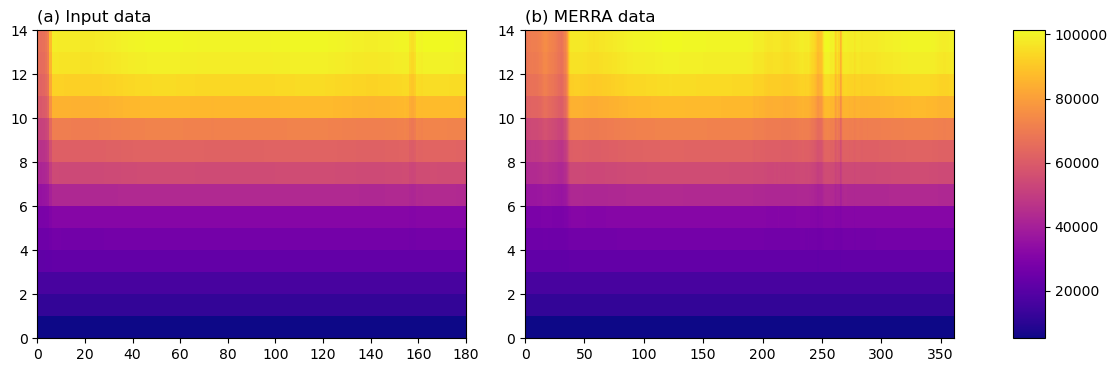

In [50]:

ind = 3
plot_fields(input_data[20 + 14*ind: 20 + 14*(ind + 1), :,180], merra_data.PL[:, :, 576 // 2])

/tmp/ipykernel_412708/1494695492.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tqi = np.trapz(qi, x=-height, axis=0)


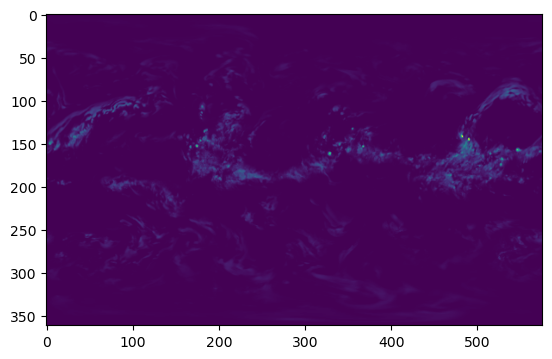

In [180]:
height = merra_data.H.data
qi = merra_data.QI.data
tqi = np.trapz(qi, x=-height, axis=0)
plt.imshow(tqi)

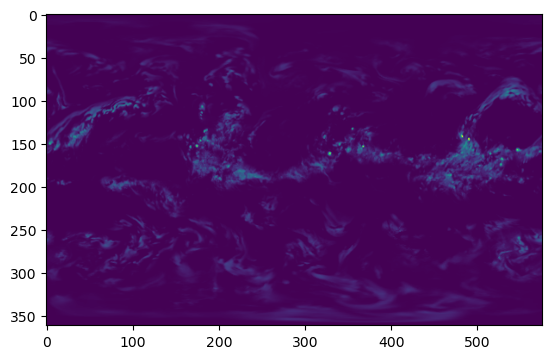

In [178]:
plt.imshow(merra_data["TQI"])

In [156]:
e3sm_data

<xarray.Dataset> Size: 5GB
Dimensions:              (time: 345, lat: 180, nbnd: 2, lon: 360, cosp_ht: 40,
                          cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6,
                          cosp_reffliq: 6, cosp_sr: 15, cosp_tau: 7,
                          cosp_tau_modis: 7, ilev: 73, lev: 72, cosp_scol: 10,
                          cosp_sza: 5)
Coordinates: (12/16)
  * lat                  (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
  * cosp_htmisr          (cosp_htmisr) float64 128B 0.0 250.0 ... 1.8e+04
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 48B 5e-06 1.5e-05 ... 7.5e-05
    ...                   ...
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_tau_modis       (cosp_tau_modis) float64 56B 0.15 0.8 ... 41.5 100.0
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * time                 (time) object 3kB 1980-01-21 00:00:00 ... 1980-12-31...
    t_days               (time) int64 3kB 20 21 22 23 24 ... 360 361 362 363 364
Dimensions without coordinates: nbnd
Data variables: (12/89)
    lat_bnds             (time, lat, nbnd) float64 994kB -90.0 -89.0 ... 90.0
    lon_bnds             (time, lon, nbnd) float64 2MB 0.0 1.0 ... 359.0 360.0
    gw                   (time, lat) float64 497kB 0.0001523 ... 0.0001523
    area                 (time, lat, lon) float64 179MB 2.658e-06 ... 2.658e-06
    CLDTOT               (time, lat, lon) float32 89MB 0.9926 0.9926 ... 0.9615
    FLDS                 (time, lat, lon) float32 89MB 150.8 150.7 ... 211.6
    ...                   ...
    nsbase               (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nscur                (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nsteph               (time) int32 1kB 1928160 1928208 ... 1944624 1944672
    sol_tsi              (time) float64 3kB -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) object 6kB 1980-01-20 00:00:00 ... 1980...
    time_written         (time) |S8 3kB b'14:49:46' b'14:49:55' ... b'15:44:24'
Attributes: (12/26)
    ne:                        30
    fv_nphys:                  2
    title:                     EAM History file information
    source:                    E3SM Atmosphere Model
    source_id:                 1e754ed78c
    product:                   model-output
    ...                        ...
    remap_hostname:            login36
    remap_version:             5.2.4
    NCO:                       netCDF Operators version 5.2.4 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /pscratch/sd/p/plma/shared/for_brandon/map_ne3...
    input_file:                /pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.amip_01...

In [157]:
merra_data.CLOUD

<xarray.DataArray 'CLOUD' (lev: 14, latitude: 361, longitude: 576)> Size: 12MB
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.685791  , 0.6855469 , 0.6850586 , ..., 0.6867676 ,
         0.68652344, 0.68603516],
        [0.70825195, 0.70825195, 0.70825195, ..., 0.70874023,
         0.7084961 , 0.7084961 ],
        [0.71777344, 0.71777344, 0.71777344, ..., 0.71777344,
         0.71777344, 0.71777344]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.04780579, 0.04826355, 0.04872131, ..., 0.04627991,
         0.04679871, 0.0473175 ],
        [0.11605835, 0.11907959, 0.12216187, ..., 0.10723877,
         0.11013794, 0.11306763],
        ...,
        [0.6921387 , 0.69262695, 0.69311523, ..., 0.6911621 ,
         0.69140625, 0.69189453],
        [0.68774414, 0.68774414, 0.6879883 , ..., 0.68725586,
         0.6875    , 0.6875    ],
        [0.68408203, 0.68408203, 0.68408203, ..., 0.68408203,
         0.68408203, 0.68408203]]], shape=(14, 361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev        (lev) float64 112B 34.0 39.0 41.0 43.0 ... 63.0 68.0 71.0 72.0
Attributes:
    long_name:       cloud_fraction_for_radiation
    units:           1
    fmissing_value:  1000000000000000.0
    standard_name:   cloud_fraction_for_radiation
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [158]:
merra_data.PL

<xarray.DataArray 'PL' (lev: 14, latitude: 361, longitude: 576)> Size: 12MB
array([[[  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591],
        [  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591],
        [  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591],
        ...,
        [  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591],
        [  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591],
        [  5201.591,   5201.591,   5201.591, ...,   5201.591,
           5201.591,   5201.591]],

       [[ 11825.002,  11825.002,  11825.002, ...,  11825.002,
          11825.002,  11825.002],
        [ 11825.002,  11825.002,  11825.002, ...,  11825.002,
          11825.002,  11825.002],
        [ 11825.002,  11825.002,  11825.002, ...,  11825.002,
          11825.002,  11825.002],
...
        [ 98610.   ,  98610.   ,  98610.   , ...,  98602.   ,
          98602.   ,  98602.   ],
        [ 98458.   ,  98466.   ,  98466.   , ...,  98458.   ,
          98458.   ,  98458.   ],
        [ 98290.   ,  98290.   ,  98290.   , ...,  98290.   ,
          98290.   ,  98290.   ]],

       [[ 68774.04 ,  68774.04 ,  68774.04 , ...,  68774.04 ,
          68774.04 ,  68774.04 ],
        [ 68038.04 ,  68045.04 ,  68052.04 , ...,  68018.04 ,
          68024.04 ,  68031.04 ],
        [ 66990.04 ,  67000.04 ,  67012.04 , ...,  66960.04 ,
          66970.04 ,  66980.04 ],
        ...,
        [100128.04 , 100128.04 , 100128.04 , ..., 100112.04 ,
         100120.04 , 100120.04 ],
        [ 99976.04 ,  99976.04 ,  99976.04 , ...,  99968.04 ,
          99968.04 ,  99976.04 ],
        [ 99800.04 ,  99800.04 ,  99800.04 , ...,  99800.04 ,
          99800.04 ,  99800.04 ]]], shape=(14, 361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev        (lev) float64 112B 34.0 39.0 41.0 43.0 ... 63.0 68.0 71.0 72.0
Attributes:
    long_name:       mid_level_pressure
    units:           Pa
    fmissing_value:  1000000000000000.0
    standard_name:   mid_level_pressure
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [168]:
e3sm_data

<xarray.Dataset> Size: 5GB
Dimensions:              (time: 345, lat: 180, nbnd: 2, lon: 360, cosp_ht: 40,
                          cosp_htmisr: 16, cosp_prs: 7, cosp_reffice: 6,
                          cosp_reffliq: 6, cosp_sr: 15, cosp_tau: 7,
                          cosp_tau_modis: 7, ilev: 73, lev: 72, cosp_scol: 10,
                          cosp_sza: 5)
Coordinates: (12/16)
  * lat                  (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                  (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * cosp_ht              (cosp_ht) float64 320B 1.896e+04 1.848e+04 ... 240.0
  * cosp_htmisr          (cosp_htmisr) float64 128B 0.0 250.0 ... 1.8e+04
  * cosp_prs             (cosp_prs) float64 56B 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 48B 5e-06 1.5e-05 ... 7.5e-05
    ...                   ...
  * cosp_tau             (cosp_tau) float64 56B 0.15 0.8 2.45 ... 41.5 100.0
  * cosp_tau_modis       (cosp_tau_modis) float64 56B 0.15 0.8 ... 41.5 100.0
  * ilev                 (ilev) float64 584B 0.1 0.1477 0.218 ... 997.0 1e+03
  * lev                  (lev) float64 576B 0.1238 0.1828 0.2699 ... 993.8 998.5
  * time                 (time) object 3kB 1980-01-21 00:00:00 ... 1980-12-31...
    t_days               (time) int64 3kB 20 21 22 23 24 ... 360 361 362 363 364
Dimensions without coordinates: nbnd
Data variables: (12/89)
    lat_bnds             (time, lat, nbnd) float64 994kB -90.0 -89.0 ... 90.0
    lon_bnds             (time, lon, nbnd) float64 2MB 0.0 1.0 ... 359.0 360.0
    gw                   (time, lat) float64 497kB 0.0001523 ... 0.0001523
    area                 (time, lat, lon) float64 179MB 2.658e-06 ... 2.658e-06
    CLDTOT               (time, lat, lon) float32 89MB 0.9926 0.9926 ... 0.9615
    FLDS                 (time, lat, lon) float32 89MB 150.8 150.7 ... 211.6
    ...                   ...
    nsbase               (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nscur                (time) int32 1kB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    nsteph               (time) int32 1kB 1928160 1928208 ... 1944624 1944672
    sol_tsi              (time) float64 3kB -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) object 6kB 1980-01-20 00:00:00 ... 1980...
    time_written         (time) |S8 3kB b'14:49:46' b'14:49:55' ... b'15:44:24'
Attributes: (12/26)
    ne:                        30
    fv_nphys:                  2
    title:                     EAM History file information
    source:                    E3SM Atmosphere Model
    source_id:                 1e754ed78c
    product:                   model-output
    ...                        ...
    remap_hostname:            login36
    remap_version:             5.2.4
    NCO:                       netCDF Operators version 5.2.4 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /pscratch/sd/p/plma/shared/for_brandon/map_ne3...
    input_file:                /pscratch/sd/q/qinyi/E3SMv2_init/v2.LR.amip_01...

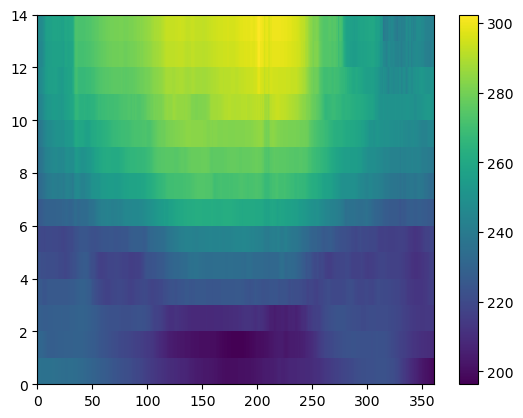

In [167]:
plt.pcolormesh(merra_data.T[:, :, 150])
plt.colorbar()

In [149]:
merra_data.CLOUD

<xarray.DataArray 'CLOUD' (lev: 14, latitude: 361, longitude: 576)> Size: 12MB
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.685791  , 0.6855469 , 0.6850586 , ..., 0.6867676 ,
         0.68652344, 0.68603516],
        [0.70825195, 0.70825195, 0.70825195, ..., 0.70874023,
         0.7084961 , 0.7084961 ],
        [0.71777344, 0.71777344, 0.71777344, ..., 0.71777344,
         0.71777344, 0.71777344]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.04780579, 0.04826355, 0.04872131, ..., 0.04627991,
         0.04679871, 0.0473175 ],
        [0.11605835, 0.11907959, 0.12216187, ..., 0.10723877,
         0.11013794, 0.11306763],
        ...,
        [0.6921387 , 0.69262695, 0.69311523, ..., 0.6911621 ,
         0.69140625, 0.69189453],
        [0.68774414, 0.68774414, 0.6879883 , ..., 0.68725586,
         0.6875    , 0.6875    ],
        [0.68408203, 0.68408203, 0.68408203, ..., 0.68408203,
         0.68408203, 0.68408203]]], shape=(14, 361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev        (lev) float64 112B 34.0 39.0 41.0 43.0 ... 63.0 68.0 71.0 72.0
Attributes:
    long_name:       cloud_fraction_for_radiation
    units:           1
    fmissing_value:  1000000000000000.0
    standard_name:   cloud_fraction_for_radiation
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [142]:
merra_data.TS

<xarray.DataArray 'TS' (latitude: 361, longitude: 576)> Size: 832kB
array([[247.91992, 247.91992, 247.91992, ..., 247.91992, 247.91992,
        247.91992],
       [248.23242, 248.24023, 248.24805, ..., 248.2168 , 248.22461,
        248.22461],
       [248.4043 , 248.42773, 248.44336, ..., 248.35742, 248.37305,
        248.38867],
       ...,
       [241.72461, 241.7168 , 241.70117, ..., 241.75586, 241.74805,
        241.73242],
       [242.25586, 242.24805, 242.24805, ..., 242.2793 , 242.27148,
        242.26367],
       [243.31055, 243.31055, 243.31055, ..., 243.31055, 243.31055,
        243.31055]], shape=(361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Attributes:
    long_name:       surface_skin_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    standard_name:   surface_skin_temperature
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [ ]:
plt.imshow(merra_data["LWGEM"] - merra_data["[0])

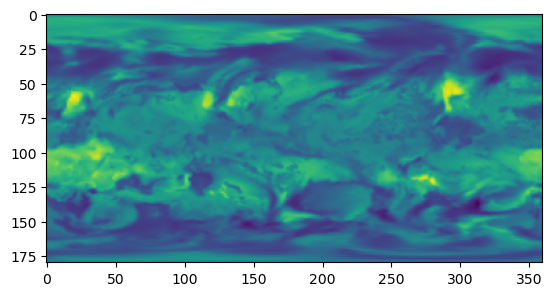

In [72]:
plt.imshow(e3sm_data["FLNS"][0])

In [150]:
merra_data.H

<xarray.DataArray 'H' (lev: 14, latitude: 361, longitude: 576)> Size: 12MB
array([[[20364.629   , 20364.629   , 20364.629   , ..., 20364.629   ,
         20364.629   , 20364.629   ],
        [20367.629   , 20367.629   , 20367.629   , ..., 20367.629   ,
         20367.629   , 20367.629   ],
        [20370.379   , 20370.379   , 20370.379   , ..., 20370.379   ,
         20370.379   , 20370.379   ],
        ...,
        [19074.129   , 19074.379   , 19074.379   , ..., 19073.379   ,
         19073.629   , 19073.879   ],
        [19070.379   , 19070.629   , 19070.629   , ..., 19070.129   ,
         19070.129   , 19070.379   ],
        [19067.129   , 19067.129   , 19067.129   , ..., 19067.129   ,
         19067.129   , 19067.129   ]],

       [[14730.125   , 14730.125   , 14730.125   , ..., 14730.125   ,
         14730.125   , 14730.125   ],
        [14733.6875  , 14733.6875  , 14733.75    , ..., 14733.625   ,
         14733.625   , 14733.625   ],
        [14737.4375  , 14737.5     , 14737.5     , ..., 14737.375   ,
         14737.375   , 14737.4375  ],
...
           161.30896 ,   161.30896 ],
        [  161.84021 ,   161.84021 ,   161.84021 , ...,   161.87146 ,
           161.84021 ,   161.84021 ],
        [  162.40271 ,   162.40271 ,   162.40271 , ...,   162.40271 ,
           162.40271 ,   162.40271 ]],

       [[ 2866.961   ,  2866.961   ,  2866.961   , ...,  2866.961   ,
          2866.961   ,  2866.961   ],
        [ 2940.961   ,  2940.961   ,  2939.961   , ...,  2943.961   ,
          2942.961   ,  2941.961   ],
        [ 3048.961   ,  3047.961   ,  3046.961   , ...,  3051.961   ,
          3050.961   ,  3049.961   ],
        ...,
        [   53.35163 ,    53.35163 ,    53.35163 , ...,    53.35163 ,
            53.35163 ,    53.35163 ],
        [   53.523506,    53.50788 ,    53.50788 , ...,    53.523506,
            53.523506,    53.523506],
        [   53.711006,    53.711006,    53.711006, ...,    53.711006,
            53.711006,    53.711006]]],
      shape=(14, 361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev        (lev) float64 112B 34.0 39.0 41.0 43.0 ... 63.0 68.0 71.0 72.0
Attributes:
    long_name:       mid_layer_heights
    units:           m
    fmissing_value:  1000000000000000.0
    standard_name:   mid_layer_heights
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [68]:
merra_data["LWGEM"]

<xarray.DataArray 'LWGEM' (latitude: 361, longitude: 576)> Size: 832kB
array([[213.86832, 213.86832, 213.86832, ..., 213.86832, 213.86832,
        213.86832],
       [215.05582, 215.05582, 215.11832, ..., 214.99332, 214.99332,
        215.05582],
       [215.86832, 215.93082, 215.99332, ..., 215.68082, 215.74332,
        215.80582],
       ...,
       [193.39957, 193.36832, 193.33707, ..., 193.52457, 193.49332,
        193.43082],
       [195.08707, 195.08707, 195.05582, ..., 195.18082, 195.14957,
        195.11832],
       [198.39957, 198.39957, 198.39957, ..., 198.39957, 198.39957,
        198.39957]], shape=(361, 576), dtype=float32)
Coordinates:
    time       datetime64[ns] 8B 2006-01-01
  * longitude  (longitude) float64 5kB -180.0 -179.4 -178.8 ... 178.8 179.4
  * latitude   (latitude) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
Attributes:
    long_name:       longwave_flux_emitted_from_surface
    units:           W m-2
    fmissing_value:  1000000000000000.0
    standard_name:   longwave_flux_emitted_from_surface
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

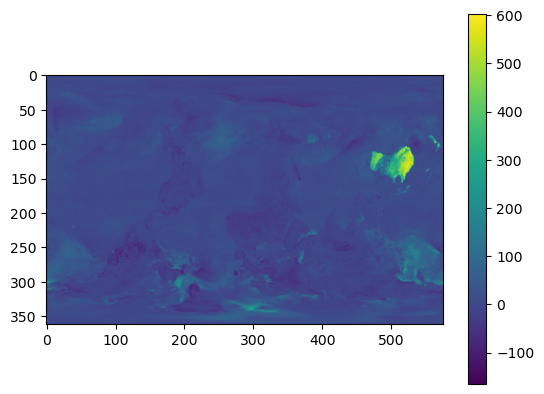

In [56]:
plt.imshow(merra_data["HFLUX"])
plt.colorbar()

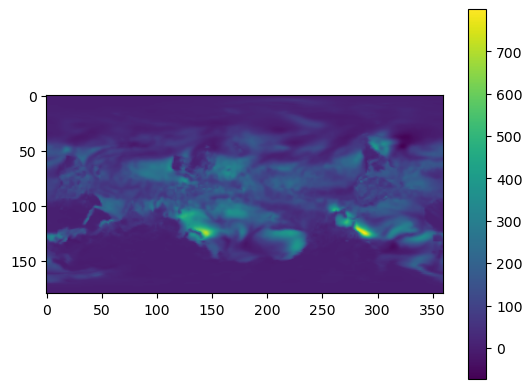

In [18]:
plt.imshow(e3sm_data["LHFLX"][0])
plt.colorbar()

In [ ]:
plt.imshow(merra_data["EFLUX"])

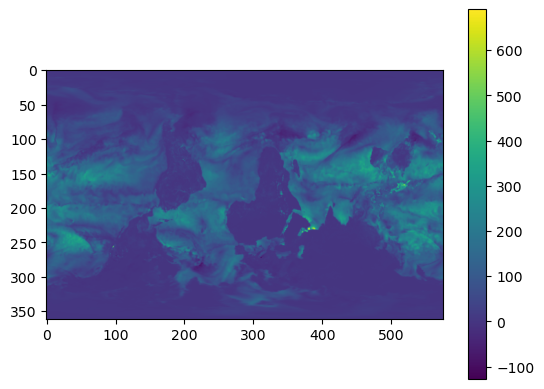

In [13]:
plt.imshow(merra_data["EFLUX"])
plt.colorbar()

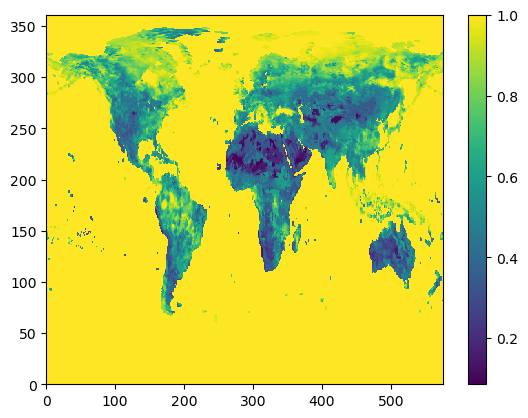

In [22]:
plt.pcolormesh(merra_data["GWETROOT"])
plt.colorbar()

In [61]:
e3sm_data.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 1kB
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5])
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Latitude of Grid Cell Centers
    standard_name:  latitude
    units:          degrees_north
    axis:           Y
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         lat_bnds